In [5]:
import pandas as pd
import numpy as np
import scipy

In [224]:
d = 10 # Number of dimensions
k = 4 # Number of classes
n = 1000 # Number of data points

In [230]:
## Create one linear classifier, and k-1 "barriers" such that,
## if point x lies between barrier i and i-1, the probability it belongs to class i
## is proportional to how close it is to that barrier
def generate_quantile_data(d, k, n):
    ## Vector that classification will be based on
    w = np.array([1/d]*d)

    ## Generate points
    scaling = 4
    projection_points = np.matrix(np.random.uniform(0, scaling*k, n)).T
    points_on_line = projection_points * w

    #Ensure noise in range as to not mess with classification too much
    noise = np.reshape(np.matrix(np.random.normal(0, scaling / (4*d), n*d)), (n, d))
    noise = noise - np.dot(noise, w).T * w
    X = points_on_line + noise

    ## Get class labels
    likely_classes = np.round(np.floor_divide(projection_points, scaling))
    probability_up = np.mod(projection_points, scaling) / scaling
    promoted = (np.matrix(np.random.uniform(0, 1, n)).T < probability_up).astype(int) 
    y = np.mod(likely_classes + promoted, k)
    
    return X,y
    

In [231]:
X,y = generate_quantile_data(d, k, n)

In [232]:
estimated_classes[estimated_classes==3].size

259

## Understand how data looks

In [233]:
from matplotlib import pyplot as plt

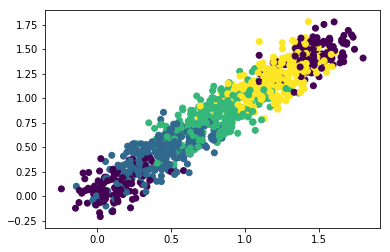

In [234]:
plt.scatter([X[:, 0]], [X[:, 1]], c = [y])